In [94]:
using Printf
using Statistics
using Random
using Pkg
using Distributions
using Plots
using SpecialFunctions

In [95]:
Random.seed!(69)

TaskLocalRNG()

# Question 1  
$\textrm{Let the probability distribution generated by the given algorithm be X. Then by conditional probability:}\vspace$  
$$\mathrm{P(X=1) = P(X=1 \mid C_{1}=1) + P(X=0 \mid C_{1}=0)}$$  
$\textrm{Because X, C1 and C2 are mutually independent events;}$  
$$\implies P(X=1) = P(C_{1}=1)[1*P(C_{2}=1) + P(X=1)*P(C_{2}=0)]+P(C_{1}=0)[P(X=1)*P(C_{2}=0)]$$  
$$\implies P(X=1) = \frac{c_{y}}{c_{y}+c_{x}}[p_{y}+P(X=1)(1-p_{y})]+\frac{c_{x}}{c_{x}+c_{y}}[P(X=1)(1-p_{x})]$$  
$\textrm{On solving the above equation for P(X=1), we get that}$  
$$P(X=1)=\frac{c_{y}p_{y}}{c_{y}p_{y}+c_{x}p_{x}}$$  
$\textrm{and hence,}$$$ X \sim \mathrm{Bern}(\frac{c_{y}p_{y}}{c_{y}p_{y}+c_{x}p_{x}})$$ 

# Question 2

### Algorithm:
1. $\textrm{Draw Proposal}$ $\mathrm{U} = \mathrm{(U_{1},U_{2},U_{3}...U_{p})} \sim \mathrm{[U(-1,1)]}^{p}$
2. $\textrm{if } \|U\| \le 1:$
3. $\>\>\>$ $\textrm{Return}$ $\mathrm{U}$
4. $\textrm{else:}$
5. $\>\>\>$ $\textrm{Go To Step 1}$

In [96]:
n_samples=10000
function samplePDimSphere(p)
    uni=Uniform(-1,1)
    accept=0
    count=0
    while(accept==0)
        count=count+1
        t=zeros(p,1)
        for i in 1:p #Generate sample proposal (p-dimensional uniform distribution iids.)
            t[i]=rand(uni)
        end 
        temp=t
        t=t.^2
        if sum(t)<=1 #Accept proposal if euclidean norm of sample is less than or equal to 1.
            accept=1
            return temp,count
        else 
            continue
        end 
    end 
end 
        
        

samplePDimSphere (generic function with 1 method)

In [97]:
function genDistribution(p,n_samples) #Function to generate n_samples number of samples for given p
    tn=zeros(n_samples,p)
    counts=zeros(n_samples,1)
    for i in 1:n_samples
        temp,counts[i]=samplePDimSphere(p)
        tn[i,:]=transpose(temp)
    end 
    return tn,counts
end 
    

genDistribution (generic function with 1 method)

In [98]:
p=2
dist,counts=genDistribution(p,n_samples)

([-0.020715451070690172 -0.6271827755033326; -0.4286889721382994 -0.6512349721756066; … ; -0.0891065528734496 0.4460549411037187; -0.18570945768247094 0.7062530224779573], [1.0; 5.0; … ; 1.0; 1.0;;])

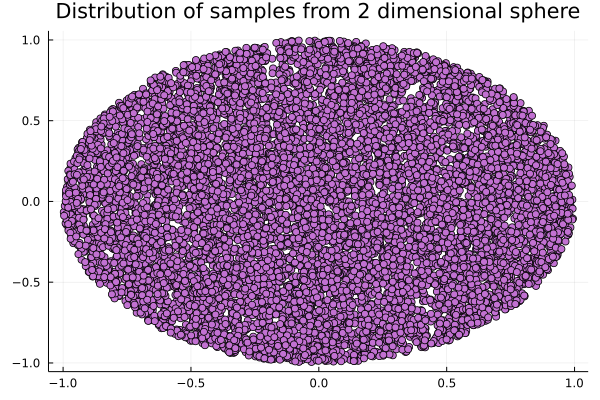

In [99]:
plot(dist[:,1],dist[:,2],seriestype=:scatter,color=4,label="",title="Distribution of samples from 2 dimensional sphere") 

In [100]:
c=(2^p)*(gamma((p/2)+1))/(π^(p/2)) #Value of c for given p (sup(f(x)/g(x)))
println("Value of c:", string(c)) #This is the expected number of loops per sample
println("Average number of loops per sample:", string(mean(counts))) #Actual number of loops per sample

Value of c:1.2732395447351628
Average number of loops per sample:1.2702


In [101]:
p=3
dist,counts=genDistribution(p,n_samples)

([0.7675023165767834 0.25902445413777175 -0.22096893067245826; 0.6317974849670698 -0.1453274983940398 0.05143892712175546; … ; -0.5543012593645646 -0.2925169786408608 -0.4841771315205532; -0.8024458339642015 0.3613177761529427 0.31046708059956485], [1.0; 4.0; … ; 1.0; 1.0;;])

In [102]:
c=(2^p)*(gamma((p/2)+1))/(π^(p/2))
println("Value of c:", string(c))
println("Average number of loops per sample:", string(mean(counts)))

Value of c:1.909859317102744
Average number of loops per sample:1.9204


In [103]:
p=4
dist,counts=genDistribution(p,n_samples)

([0.024822598035968646 0.9128787744100699 -0.07340817570766389 -0.36759140382149136; -0.008924642978548336 0.06923936504862449 -0.3683916003128187 -0.013218592368345217; … ; 0.024687640766050345 0.6345776470858173 0.22662483491996732 -0.10366554019979302; -0.027194092812772963 -0.6459617735909002 0.5954299319718319 0.11805079632432691], [10.0; 4.0; … ; 6.0; 1.0;;])

In [104]:
c=(2^p)*(gamma((p/2)+1))/(π^(p/2))
println("Value of c:", string(c))
println("Average number of loops per sample:", string(mean(counts)))

Value of c:3.242277876554809
Average number of loops per sample:3.2494


In [105]:
p=5
dist,counts=genDistribution(p,n_samples)

([0.6159052238473823 -0.3485175450210758 … -0.5935627456520984 0.22721231760760552; -0.6024582908510787 -0.06547161422126524 … -0.1894221330657626 0.6068620434818521; … ; -0.15027772479143464 -0.17831908253647 … 0.17903193726073052 -0.2533915926937198; -0.6293286962236166 -0.19411188444791283 … -0.38350695224070974 -0.2024735523905783], [10.0; 3.0; … ; 12.0; 1.0;;])

In [106]:
c=(2^p)*(gamma((p/2)+1))/(π^(p/2))
println("Value of c:", string(c))
println("Average number of loops per sample:", string(mean(counts)))

Value of c:6.0792710185402665
Average number of loops per sample:6.1046


In [107]:
p=6
dist,counts=genDistribution(p,n_samples)

([-0.02058711763696075 0.34310291130156867 … -0.29565782636408366 -0.25124145765054706; 0.6082850609379151 -0.07931945153650743 … 0.12336606546359108 0.22836613219851132; … ; -0.2710375272181187 -0.08418274876250154 … -0.021039766905514234 0.6583835859892302; -0.009328823353324633 -0.4008016729406185 … 0.6228202262393487 0.2478290576483393], [16.0; 22.0; … ; 2.0; 32.0;;])

In [108]:
c=(2^p)*(gamma((p/2)+1))/(π^(p/2))
println("Value of c:", string(c))
println("Average number of loops per sample:", string(mean(counts)))

Value of c:12.384589222348605
Average number of loops per sample:12.3352


#### What happens as p increases?
As we can see, as p increases the average number of loops required to generate one sample increases. This means that the algorithm becomes more ineffecient as p increases

# Question 3

In [109]:
function genTruncNormal(a) #Function to generate 1 sample from Truncated normal distribution
    prop=Normal(0,1)
    uniform=Uniform()
    accept=0
    count=0
    while (accept==0)
        u=rand(uniform)
        p=rand(prop)
        count=count+1
        c=cdf(prop,a)-cdf(prop,-a) #Value of sup(f(x)/g(x))
        if p<-a || p>a
            val=0
        else 
            val=pdf(prop,p)
        end
        if u<val/(c*pdf(prop,p))
            accept=1
            return p,count
        else 
            continue
        end 
    end  
end

genTruncNormal (generic function with 1 method)

In [110]:
a=4 #Sample from Truncated Normal distribution from -4 to +4
n_samples=100000
tn=zeros(n_samples,1)
counts_4=zeros(n_samples,1)
for i in 1:n_samples
    tn[i],counts_4[i]=genTruncNormal(a)
end 
    

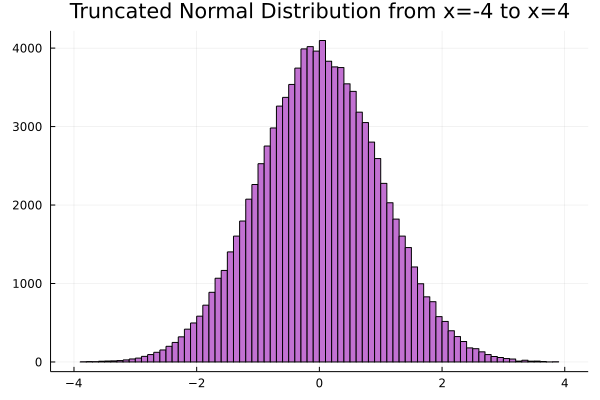

In [111]:
histogram(tn,color=4,label="",title="Truncated Normal Distribution from x=-4 to x=4")

In [112]:
findall(x->(x>4)||(x<-4),tn) #As we can see there are no values with x<-4 or x>4 in our samples

CartesianIndex{2}[]

In [113]:
mean(tn) #The mean is still 0

0.001548519298629527

In [114]:
var(tn) 

1.0048899545606784

In [115]:
a=1 #Truncated Normal distribution from -1 to 1
n_samples=100000
tn=zeros(n_samples,1)
counts_1=zeros(n_samples,1)
for i in 1:n_samples
    tn[i],counts_1[i]=genTruncNormal(a)
end 

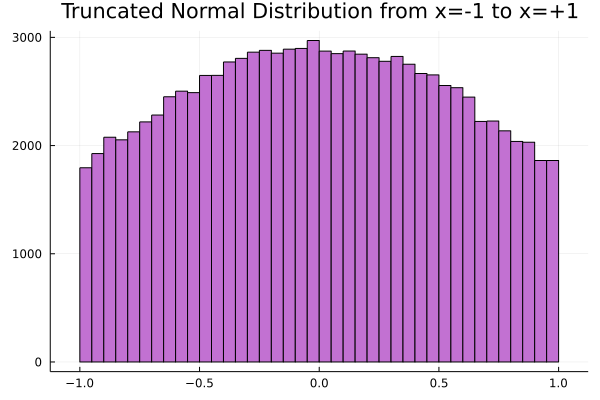

In [116]:
histogram(tn,color=4,label="", title="Truncated Normal Distribution from x=-1 to x=+1")

In [117]:
findall(x->(x>a)||(x<-a),tn)

CartesianIndex{2}[]

In [118]:
mean(tn)

-0.0006751284676478436

In [119]:
var(tn)

0.29122395531984324

In [120]:
c_4=1/(cdf(Normal(0,1),4)-cdf(Normal(0,1),-4))
c_1=1/(cdf(Normal(0,1),1)-cdf(Normal(0,1),-1))

1.4647947734915436

In [121]:
println("Avg number of loops before acceptance when a=4:", string(mean(counts_4)))
println("Avg number of loops before acceptance when a=1:", string(mean(counts_1)))
println("Value of c when a=4:", string(c_4))
println("Value of c when a=1:", string(c_1))

Avg number of loops before acceptance when a=4:1.00006
Avg number of loops before acceptance when a=1:1.46222
Value of c when a=4:1.0000633464961906
Value of c when a=1:1.4647947734915436


#### What are the differences between the two settings?
As we can see, the mean number of loops required per sample for the case where a=1 is higher than the case where a=4. Intuitively, this makes sense because a Standard Normal Distribution hardly has any values beyond x=4 or below x=-4. Mathematically, this can be seen as the expected number of loops in the accept-reject algorithm is c, and as we can see c is higher for the case where a=1. Hence it is more ineffecient to draw the Truncated Normal Distribution that has a=1 in this case.
